In [1]:
from utils.mt5 import login_

login_()

Connected to MetaTrader5 successfully!


In [2]:
import pandas as pd
from utils.mt5 import get_currency_pair_data_

# majors = [ "EURUSD", "GBPUSD", "USDJPY", "USDCHF", "EURJPY", "USDCAD", "AUDUSD", "NZDUSD"]

# Step1 - Combine Majors into df

In [22]:
currencies = ["EURJPY", "USDJPY", "USDCHF"]

curr_dict = {}
for currency in currencies:
    curr_dict[currency] = get_currency_pair_data_(currency, years_back=1)['close']

df = pd.concat(curr_dict, axis=1).to_period('D')
df.tail()

,EURJPY,USDJPY,USDCHF
time,,,
2024-11-15,162.631,154.354,0.88811
2024-11-17,162.926,154.634,0.88842
2024-11-18,163.796,154.611,0.88321
2024-11-19,164.105,154.717,0.88205
2024-11-20,164.374,155.676,0.88428


# Step2 - Pick top 2 trending pairs

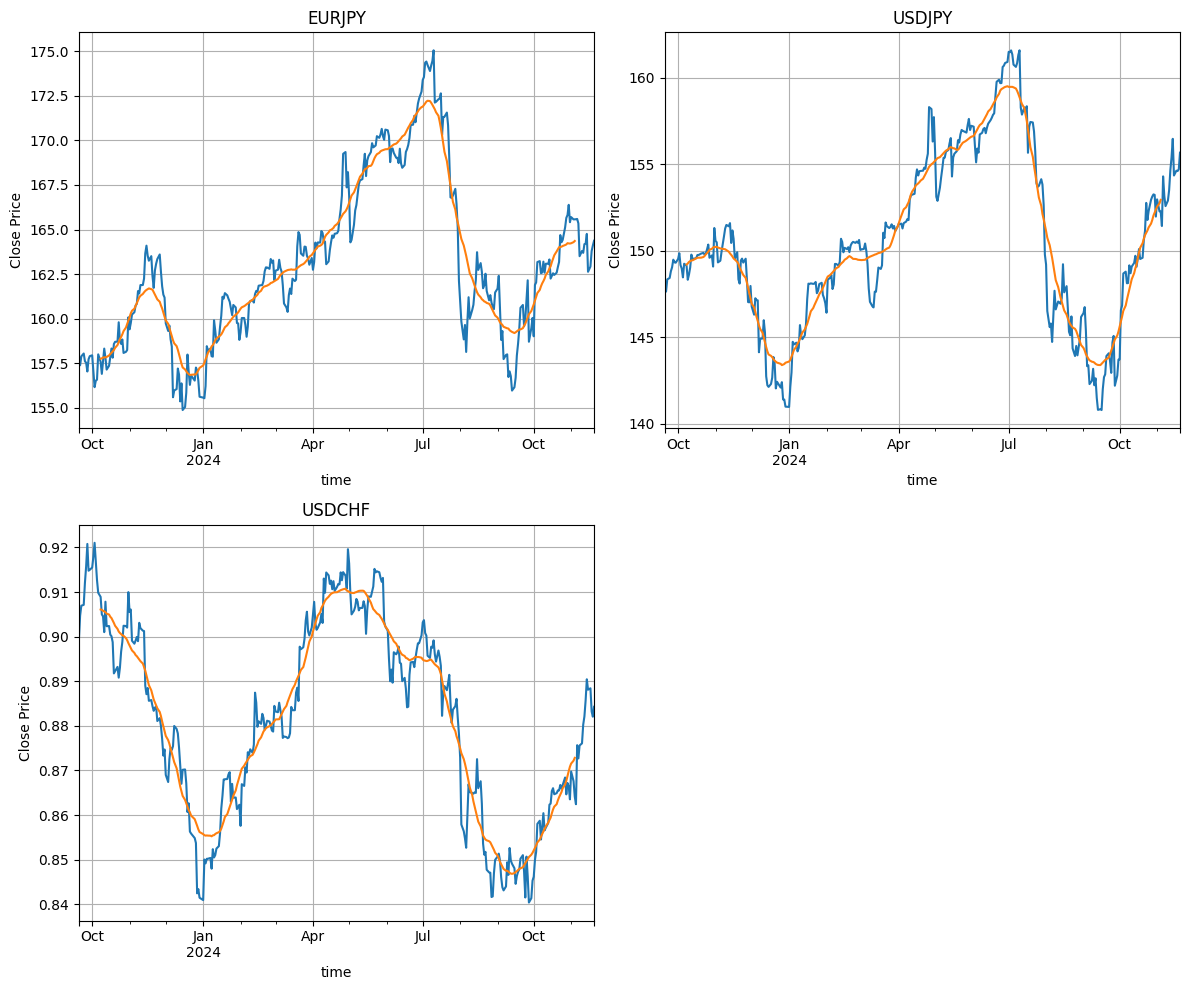

In [23]:
import matplotlib.pyplot as plt 

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, pair in enumerate(df.columns):
    ax = axes[i]
    df[pair].plot(ax=ax, title=pair, xlabel='Time', ylabel='Close Price')
    ma = df[pair].rolling(window=30, center=True).mean()
    ma.plot(ax=ax)
    ax.grid()

for j in range(len(df.columns), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()